In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Set plot style
sns.set_style('whitegrid')

In [ ]:
print("Downloading dataset")
path=kagglehub.dataset_download("redwankarimsony/heart-disease-data")
file_path=f'{path}/heart_disease_uci.csv'
df=pd.read_csv(file_path)
print("DataSet downloaded and loaded sucessfully.")
print(f"Data shape:{df.shape}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
DataSet downloaded and loaded sucessfully.
Data shape:(920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
print("Data Information:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum().sum())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Descriptive Statistics:
               id         age    trestbps        chol      thalch     oldpeak  \
count

In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


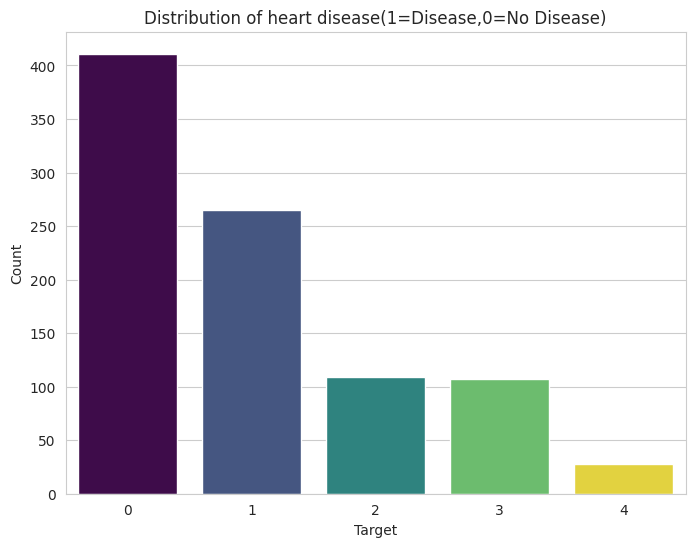

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='num',data=df,palette='viridis',hue='num',legend=False)
plt.title('Distribution of heart disease(1=Disease,0=No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

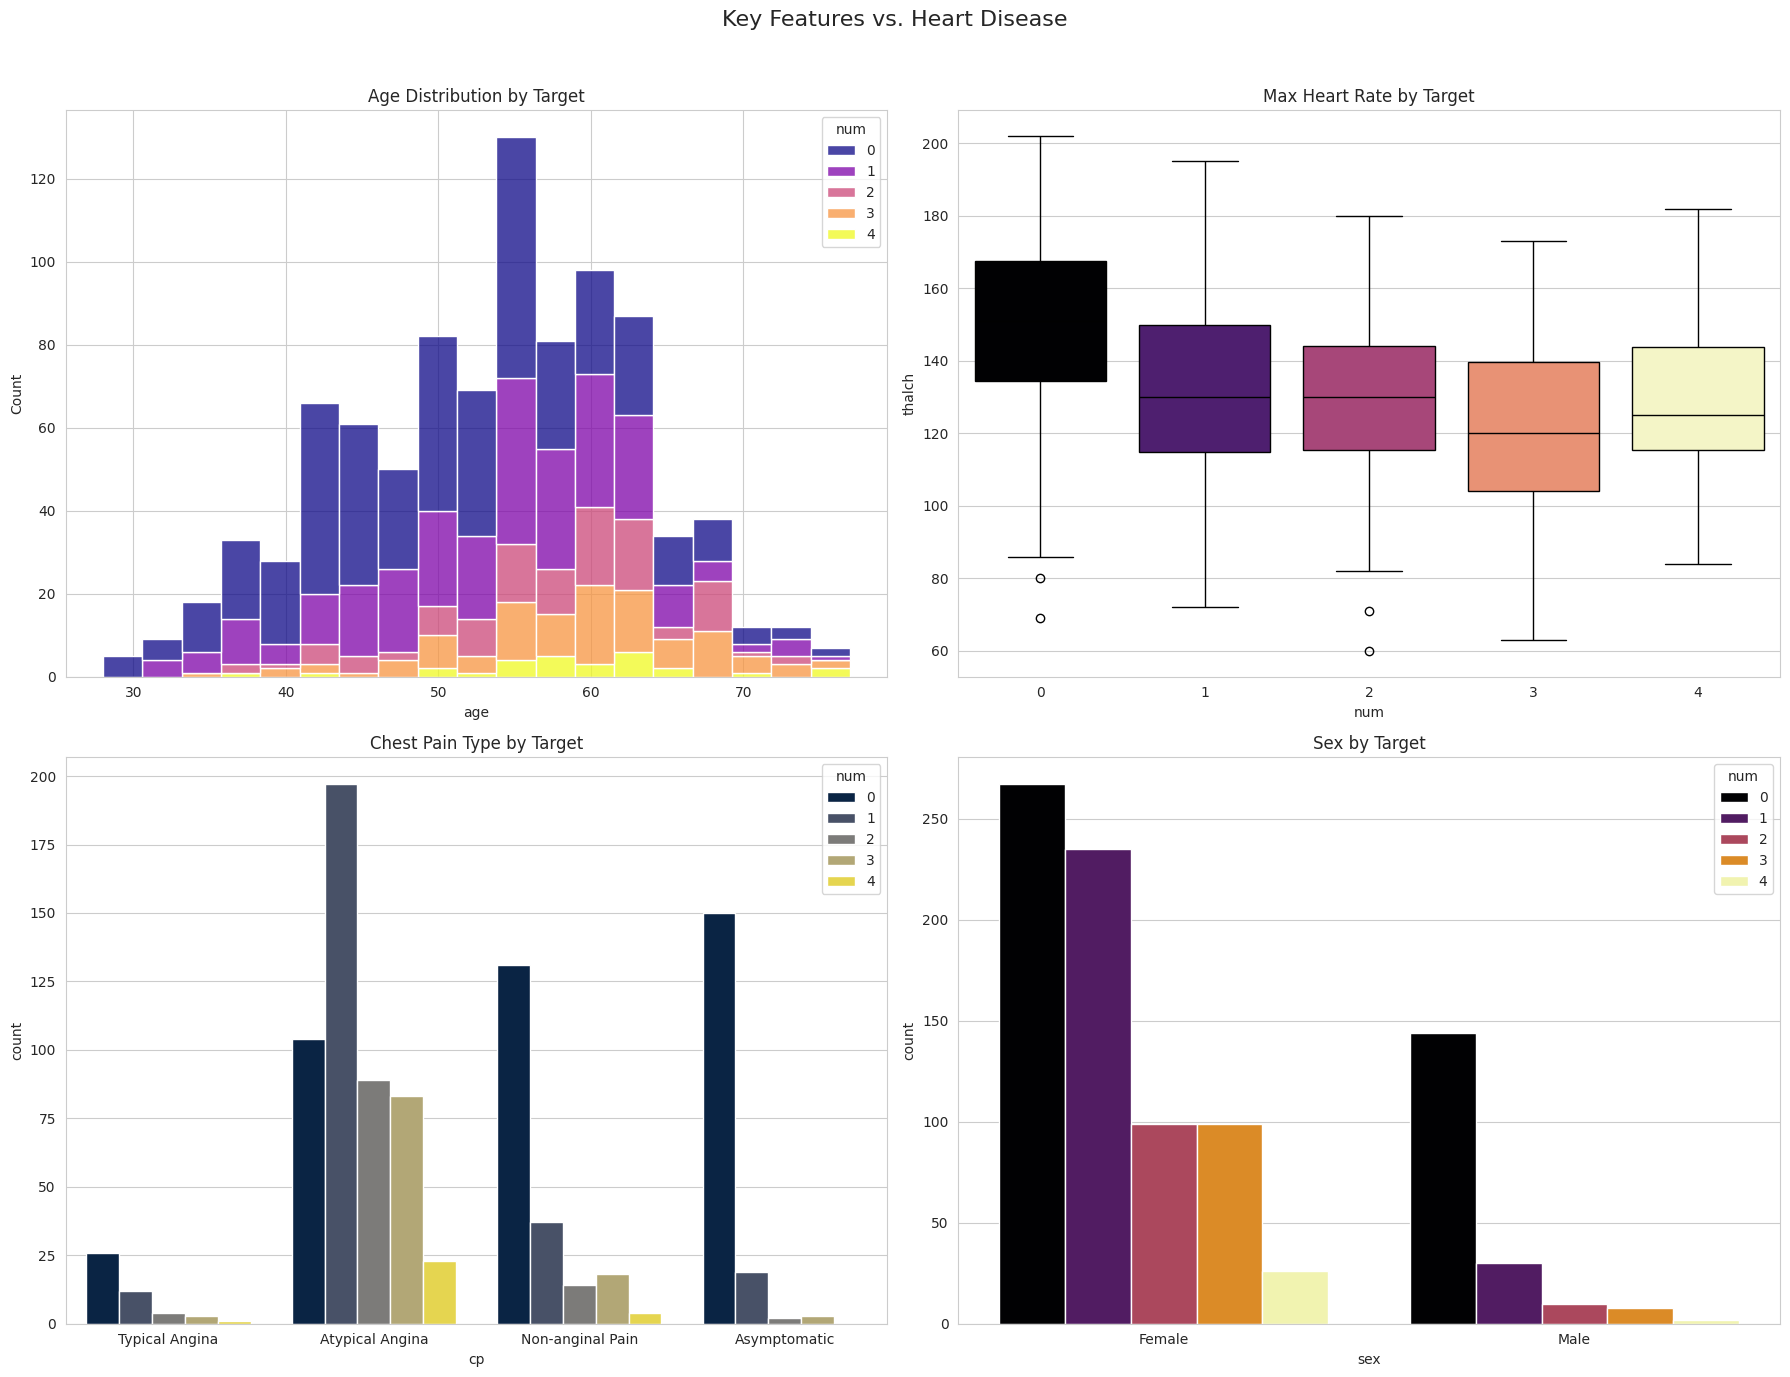

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)
sns.histplot(ax=axes[0, 0], data=df, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
sex_plot = sns.countplot(ax=axes[1, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

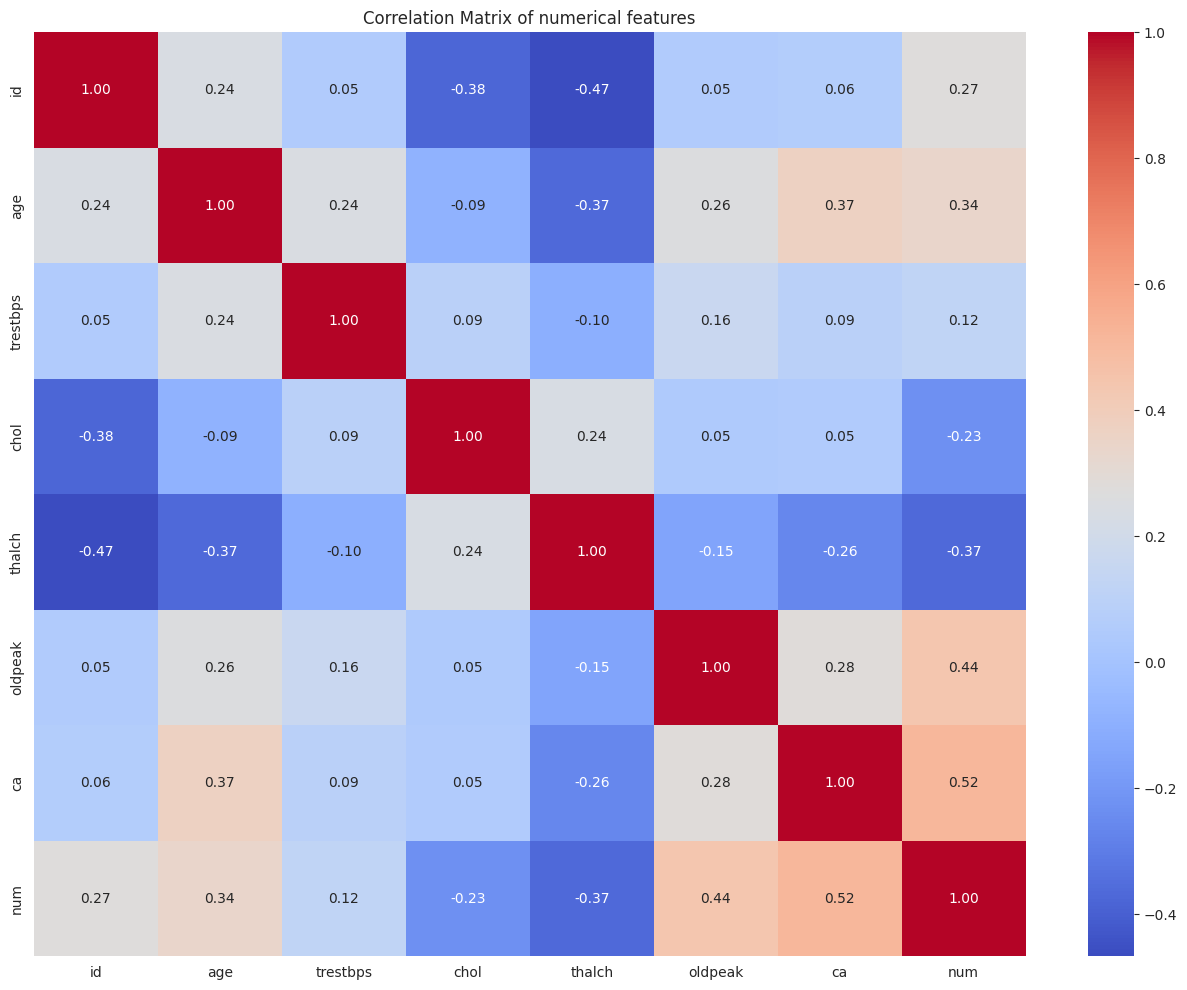

In [ ]:
plt.figure(figsize=(16,12))
numerical_df=df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of numerical features')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
X=df.drop('num',axis=1)
y=df['num']
X=X.drop(['id','dataset'],axis=1)
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
numerical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])
categorical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor=ColumnTransformer(transformers=[('num',numerical_transformer,numerical_features),('cat',categorical_transformer,categorical_features)])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
all_features=X_train.columns.tolist()
categorical_features=[col for col in all_features if X_train[col].dtype=='object']
numerical_features=[col for col in all_features if X_train[col].dtype !='object']
print("Numerical features:",numerical_features)
print("Categorical features:",categorical_features)
numeriacl_transformation=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])
categorical_transformation=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor=ColumnTransformer(transformers=[('num',numeriacl_transformation,numerical_features),('cat',categorical_transformation,categorical_features)])
lr_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('classifier',LogisticRegression(random_state=42))])
lr_pipeline.fit(X_train,y_train)
y_pred_lr=lr_pipeline.predict(X_test)

Numerical features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [ ]:
rf_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('classifier',RandomForestClassifier(random_state=42))])
rf_pipeline.fit(X_train,y_train)
y_pred_rf=rf_pipeline.predict(X_test)

In [ ]:
from sklearn.svm import SVC
svm_pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                             ('classifier',SVC(random_state=42))])
svm_pipeline.fit(X_train,y_train)
y_pred_svm=svm_pipeline.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                             ('classifier',KNeighborsClassifier())])
knn_pipeline.fit(X_train,y_train)
y_pred_knn=knn_pipeline.predict(X_test)

In [ ]:
print("logistic regression")
print(classification_report(y_test,y_pred_lr,zero_division=0))
print("Random Forest")
print(classification_report(y_test,y_pred_rf,zero_division=0))
print("Support Vector Machine")
print(classification_report(y_test,y_pred_svm,zero_division=0))
print("KNN")
print(classification_report(y_test,y_pred_knn,zero_division=0))

logistic regression
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        82
           1       0.46      0.57      0.51        53
           2       0.30      0.14      0.19        22
           3       0.23      0.24      0.23        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.36      0.36      0.35       184
weighted avg       0.55      0.58      0.56       184

Random Forest
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        82
           1       0.50      0.55      0.52        53
           2       0.00      0.00      0.00        22
           3       0.18      0.14      0.16        21
           4       0.00      0.00      0.00         6

    accuracy                           0.55       184
   macro avg       0.28      0.31      0.29       184
weighted avg       0.49      0.55      0.52

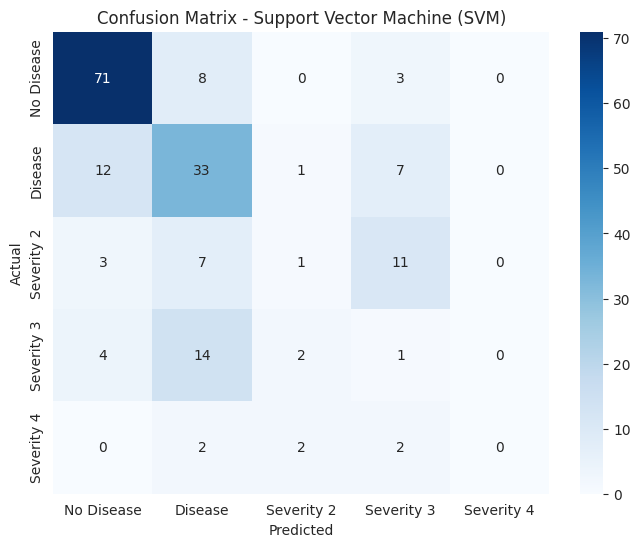

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'], yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()

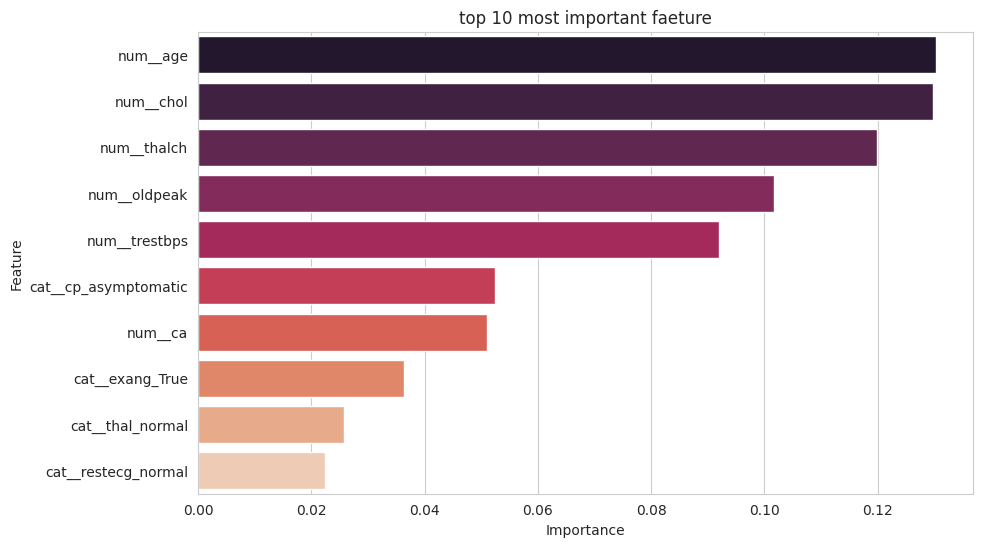

In [ ]:
feature_names=rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances=rf_pipeline.named_steps['classifier'].feature_importances_
feature_importance_df=pd.DataFrame({'Feature':feature_names,'Importance':importances})
feature_importance_df=  feature_importance_df.sort_values(by='Importance',ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feature_importance_df,palette='rocket',hue='Feature',legend=False)
plt.title('top 10 most important faeture')
plt.show()